<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

dataset = load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Start off by finding the keys of the dataset**

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


**Load the dataset into a Pandas DataFrame**

In [0]:
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names, dtype=np.float)
data['TARGET'] = dataset.target
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  TARGET
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2

[5 rows x 14 columns]


**Check for null values**

In [0]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64


**Visualize features**

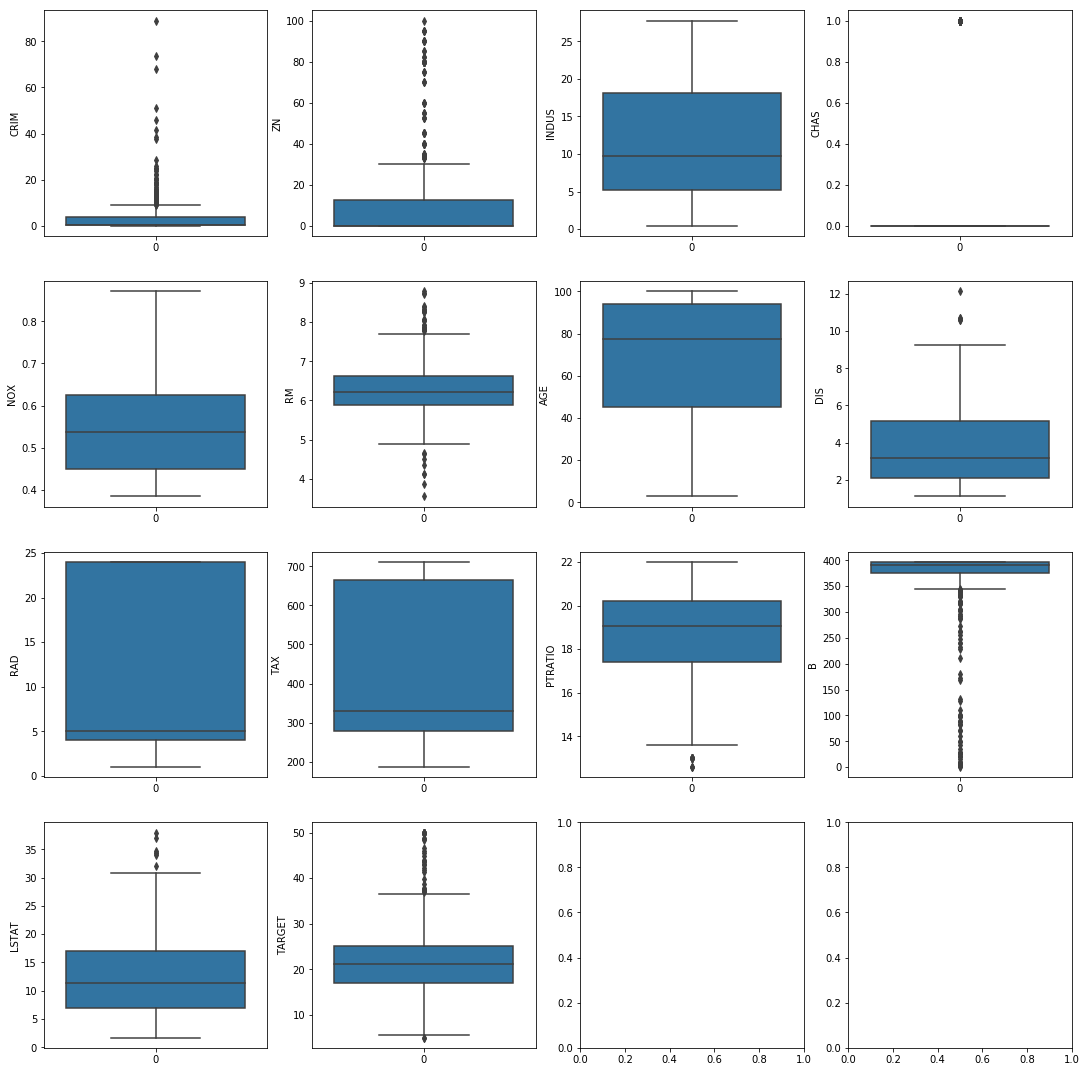

In [0]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(len(data.columns)):
  axs[i//4][i%4].set(ylabel=data.columns[i])
  sns.boxplot(data=data[data.columns[i]], ax=axs[i//4][i%4])
plt.show()


**Normalize features**

In [0]:
def normalize(data, column):
  data[column] = (data[column] - data[column].mean())/data[column].std()

def minmax_scaler(data, column, scale=4):
  data[column] = scale*data[column]/(data[column].max() - data[column].min())
  
minmax_scaler(data, 'CRIM')
minmax_scaler(data, 'ZN')
normalize(data, 'INDUS')
# CHAS doesn't need normalization
normalize(data, 'NOX')
normalize(data, 'RM')
normalize(data, 'AGE')
normalize(data, 'DIS')
normalize(data, 'RAD')
normalize(data, 'TAX')
normalize(data, 'PTRATIO')
minmax_scaler(data, 'B')
normalize(data, 'LSTAT')

print(data.head())


       CRIM    ZN     INDUS  CHAS  ...   PTRATIO         B     LSTAT  TARGET
0  0.000284  0.72 -1.286636   0.0  ... -1.457558  4.003228 -1.074499    24.0
1  0.001228  0.00 -0.592794   0.0  ... -0.302794  4.003228 -0.491953    21.6
2  0.001227  0.00 -0.592794   0.0  ... -0.302794  3.962177 -1.207532    34.7
3  0.001455  0.00 -1.305586   0.0  ...  0.112920  3.980332 -1.360171    33.4
4  0.003104  0.00 -1.305586   0.0  ...  0.112920  4.003228 -1.025487    36.2

[5 rows x 14 columns]


**Visualise features again to see preprocessing effects. Note how all features cover a similar range now.**

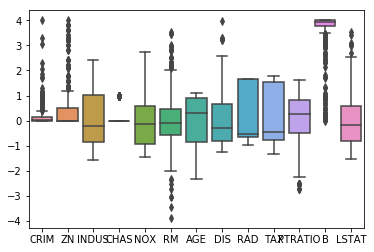

In [0]:
sns.boxplot(data=data.drop('TARGET', axis=1))

**Check for dependent variables**

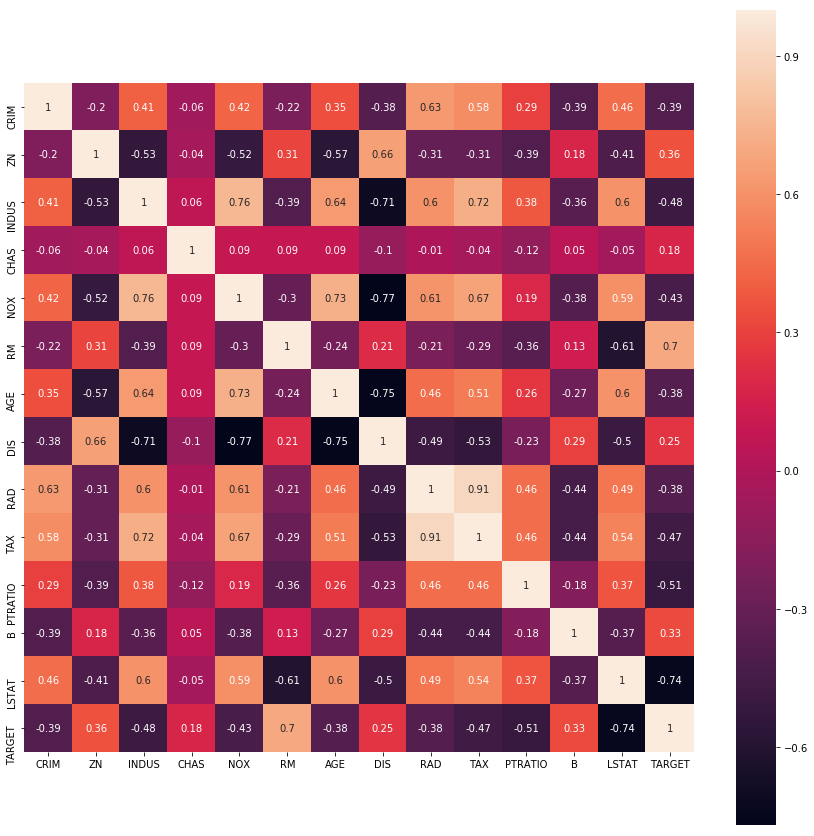

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
corr = data.corr().round(2)
sns.heatmap(data=corr, annot=True, square=True, ax=ax)

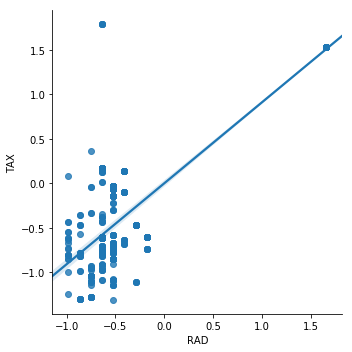

In [0]:
sns.lmplot(x='RAD', y='TAX', data=data)

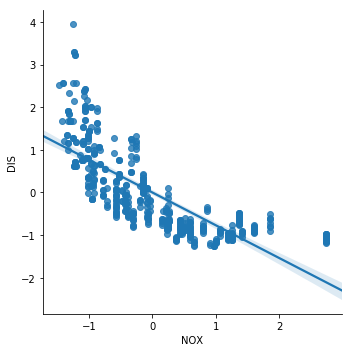

In [0]:
sns.lmplot(x='NOX', y='DIS', data=data)

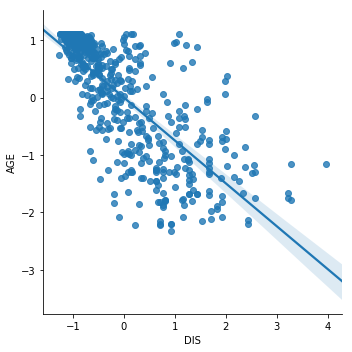

In [0]:
sns.lmplot(x='DIS', y='AGE', data=data)

**All features seem okay to keep, so we will move on to linear regression using gradient descent**

In [0]:
m = len(data.index)
n = len(data.drop('TARGET', axis=1).columns)
data.insert(0, 'BIAS', np.ones(m))
X = data.drop('TARGET', axis=1).to_numpy()
y = data['TARGET'].to_numpy()

In [0]:
print(X.shape)
print(y.shape)

(506, 14)
(506,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
theta = np.random.uniform(low=-1, high=1, size=(n+1,))

m_train = y_train.shape[0]
m_test = y_test.shape[0]

LEARNING_RATE = 0.01
ITERATIONS = 10000

In [0]:
def J(X, y, theta):
  diff = np.matmul(X, theta) - y
  return (1/(2*diff.shape[0])) * np.dot(diff, diff)

training_error = [J(X_train, y_train, theta)]
testing_error = [J(X_test, y_test, theta)]

PRINT_EVERY = 500

for i in range(ITERATIONS):
  theta = theta - LEARNING_RATE * (1/m_train) * np.matmul(np.transpose(X_train), np.matmul(X_train, theta) - y_train)
  training_error.append(J(X_train, y_train, theta))
  testing_error.append(J(X_test, y_test, theta))
  if (i+1) % PRINT_EVERY == 0:
    print('ITERATION ' + str(i+1) + ': ' + str(training_error[-1]) + ', ' + str(testing_error[-1]))
  

ITERATION 500: 15.946906605142841, 16.621890100922734
ITERATION 1000: 14.279840339553722, 14.65870507128634
ITERATION 1500: 13.23645698143326, 13.406282310427732
ITERATION 2000: 12.554053119752247, 12.584227910307591
ITERATION 2500: 12.100839355774173, 12.03505651005341
ITERATION 3000: 11.797642947464473, 11.664242915093613
ITERATION 3500: 11.59390171273077, 11.411701527303569
ITERATION 4000: 11.456565596590577, 11.238335985748142
ITERATION 4500: 11.363779454581469, 11.11838516706952
ITERATION 5000: 11.300984765092322, 11.034721780074612
ITERATION 5500: 11.258432816356262, 10.97587451773978
ITERATION 6000: 11.22957026307071, 10.934110648479695
ITERATION 6500: 11.209978870446912, 10.904186994989855
ITERATION 7000: 11.196673301058453, 10.882528679792875
ITERATION 7500: 11.18763304092824, 10.86668492797707
ITERATION 8000: 11.18148886053469, 10.854966112774212
ITERATION 8500: 11.17731200238309, 10.84620035940536
ITERATION 9000: 11.17447203352747, 10.839569564041044
ITERATION 9500: 11.17254

**Now to graph results**

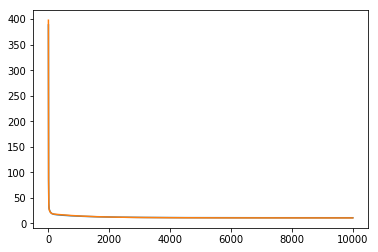

In [0]:
plt.plot(training_error)
plt.plot(testing_error)
plt.show()

**Calculate $r^2$ score**

In [0]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, np.matmul(X_test, theta))
print('R2 Score: ' + str(r2))

R2 Score: 0.7013632251139457
